# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
from scipy.interpolate import lagrange
from math import factorial
from random import uniform, randint


In [2]:
def product(C):
    ret = 1
    for i in C:
        ret = ret*i
    return ret

def L(x, X, j):
    factors = [(x-X[i])/(X[j]-X[i]) for i in range(len(X)) if j != i]
    return product(factors)

def P(x, X, Y):
    try:
        ret = [P(i,X,Y) for i in x]
    except:
        pass
    factors = [Y[k]*L(x, X, k) for k in range(len(X))]
    return sum(factors)

def error(f, n, X, x0 = -0.1):
    if x0==False:
        x0 = uniform(X[0], X[-1])

    x = sy.symbols("x")
    F = sy.lambdify(x, -sy.simplify(sy.diff(f(x),x,n+1)))
    F_E = sc.optimize.minimize(F, x0).fun

    print(F)

    prod = product([x-X_k for X_k in X])
    res = (prod*F_E)/(factorial(n+1))
    return(sy.lambdify(x, res))


x = sy.symbols("x")

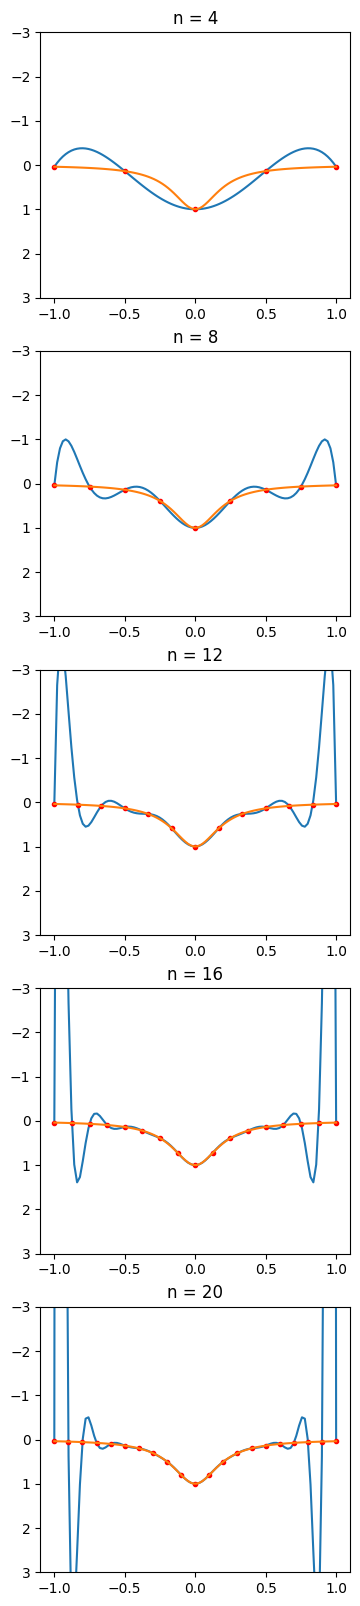

In [17]:
N = [4,8,12,16,20]

f = lambda x : 1/(1+25*x**2)
X = np.linspace(-1,1, 100)
x = sy.symbols('x')

# faux va a guardar las funciones que interpolan para cada n en N
faux = []
for n in N:
    Xl = np.linspace(-1,1, n+1)
    Y = f(Xl)
    faux.append(sy.lambdify(x,P(x,Xl,Y)))


k = len(N)

fig, ax = plt.subplots(k, figsize = (4*1,4*k))

for i, n in enumerate(N):
    Xl = np.linspace(-1,1, n+1)
    ax[i].set_title(f'n = {n}')
    ax[i].plot(X,faux[i](X))
    ax[i].plot(Xl,f(Xl),"r.")
    ax[i].plot(X,f(X))

    ax[i].set_ylim([3,-3])

(3.0, -3.0)

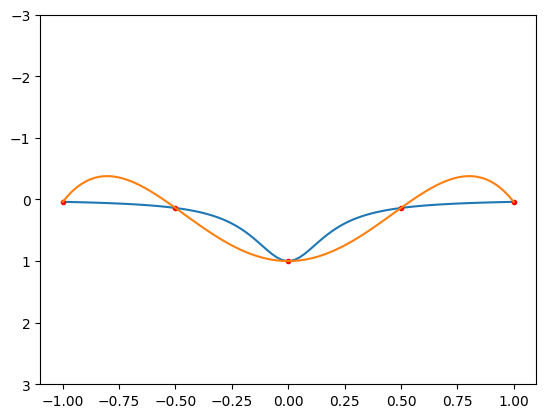

In [5]:
f = lambda x : 1/(1+25*x**2)

X = np.linspace(-1,1, 100)

plt.plot(X, f(X))

n = 4
Xl = np.linspace(-1,1, n+1)
pl = lagrange(Xl, f(Xl))

plt.plot(Xl,f(Xl),"r.")
plt.plot(X, pl(X))
plt.ylim([3,-3])

el error (aproximado) en 0.5 es: -0.0 
esto se debe a que 0.5 es uno de los puntos de interpolación


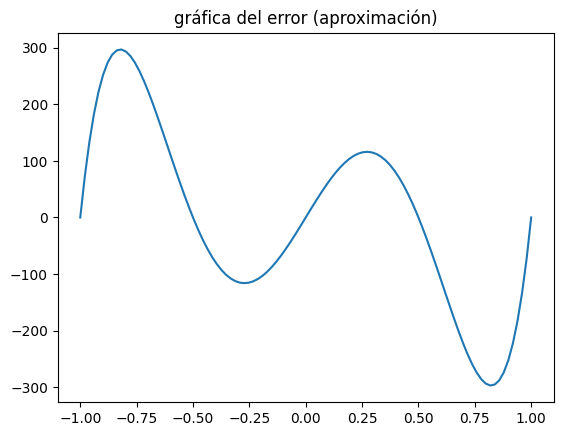

In [6]:
n = 4
x0=-0.1
X = np.linspace(-1,1, 100)
Xl = np.linspace(-1,1, n+1)

if x0==False:
    x0 = uniform(X[0], X[-1])

x = sy.symbols("x")
F = sy.lambdify(x, -sy.simplify(sy.diff(f(x),x,n+1)))
F_E = sc.optimize.minimize(F, x0, method = 'CG')


prod = product([x-X_k for X_k in Xl])
res = (prod*(-F_E.fun))/(factorial(n+1))
myfun = sy.lambdify(x, res)

print(f'el error (aproximado) en 0.5 es: {myfun(0.5)} \nesto se debe a que 0.5 es uno de los puntos de interpolación')

plt.title("gráfica del error (aproximación)")
plt.plot(X, myfun(X))
plt.show()


##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

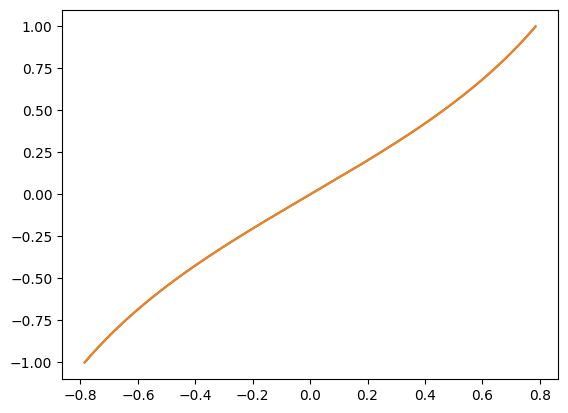

In [7]:
N = 10
X = np.linspace(-np.pi/4, np.pi/4, N)
f = np.tan
interpolation = lagrange(X,f(X))
Xg = np.linspace(-np.pi/4, np.pi/4, 200)
plt.plot(Xg,f(Xg))
plt.plot(Xg,interpolation(Xg))

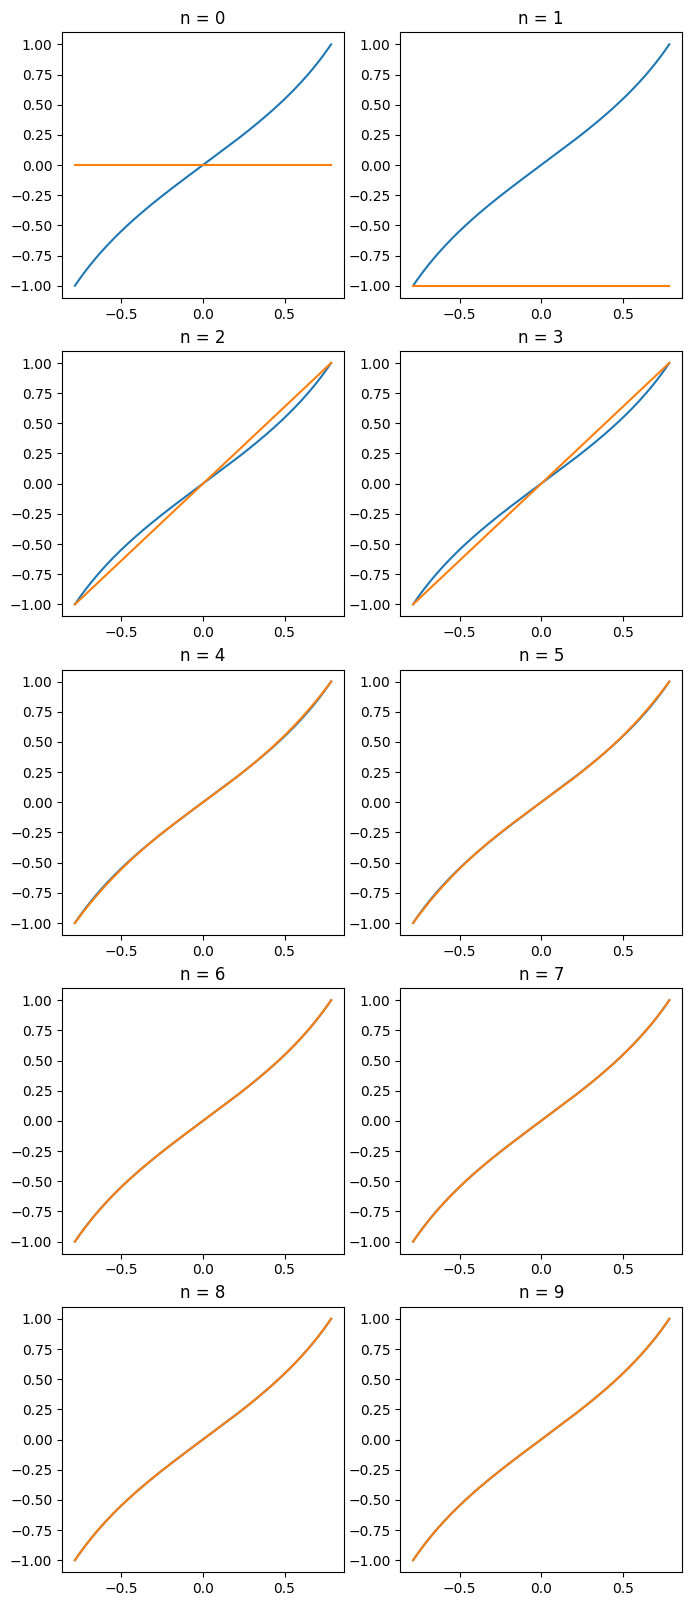

In [8]:
k = 5

fig, ax = plt.subplots(k, 2, figsize = (4*2,4*k))

for i in range(len(ax)):
    for j in range(len(ax[i])):
        N = (i*2+j)
        X = np.linspace(-np.pi/4, np.pi/4, N)
        interpolation = lagrange(X,f(X))

        Xg = np.linspace(-np.pi/4, np.pi/4, 200)
        ax[i,j].set_title(f'n = {N}')
        ax[i,j].plot(Xg,f(Xg))
        ax[i,j].plot(Xg,interpolation(Xg))

##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


In [18]:
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

data = pd.DataFrame({'x':x, 'fx':fx})
lag = lagrange(data.x,data.fx)
data

,x,fx
0,1.0,0.765198
1,1.3,0.620086
2,1.6,0.455402
3,1.9,0.281819
4,2.2,0.110362


Text(0.5, 1.0, 'interpolación por polinomios de lagrange')

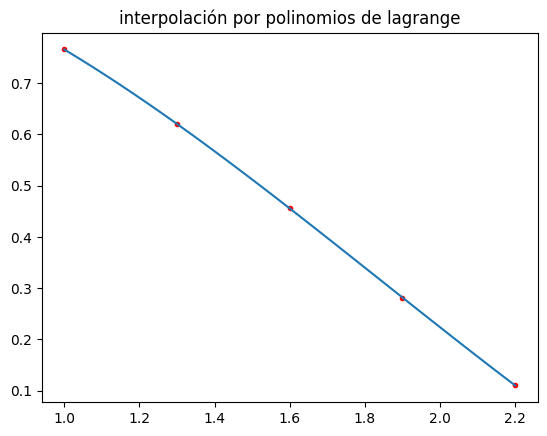

In [24]:
X = np.linspace(1,2.2,100)

fig, ax = plt.subplots()

ax.plot(data.x,data.fx,'r.')
ax.plot(X, lag(X))
ax.set_title('interpolación por polinomios de lagrange')

plt.show()

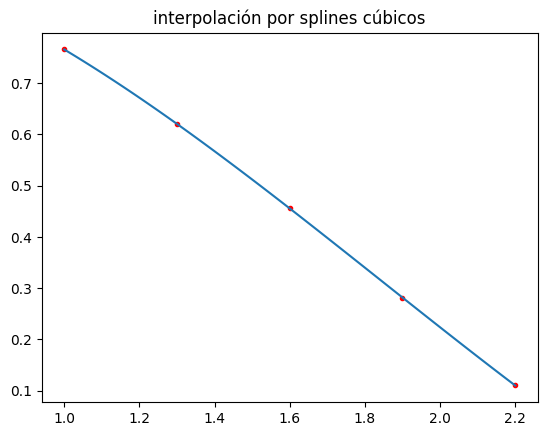

In [26]:
X = np.linspace(1,2.2,100)

fig, ax = plt.subplots()

ax.plot(data.x,data.fx,'r.')
ax.plot(X,sc.interpolate.CubicSpline(data.x,data.fx)(X))
ax.set_title('interpolación por splines cúbicos')

plt.show()

Prácticamente no hay diferencia entre ambos métodos, esto se debe a que al tener solo 5 puntos la interpolación de lagrange es un polinomio de grado 4, lo cual no dista mucho de los polinomios de grado 3 de la interpolación de splines cúbicos, además los puntos están bastante juntos lo que ayuda a que la interpolación de lagrange sea suave.

##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

0.5

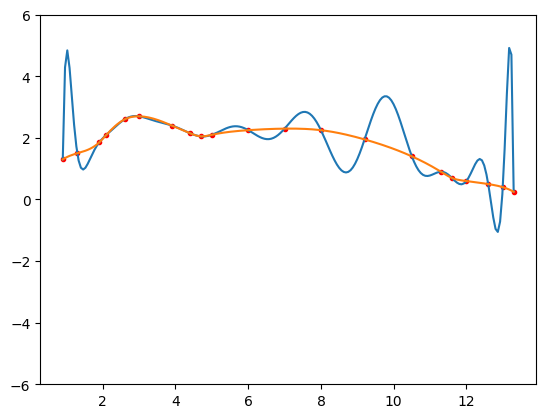

In [11]:
x = [0.9,1.3,1.9,2.1,2.6,3,3.9,4.4,4.7,5,6,7,8,9.2,10.5,11.3,11.6,12,12.6,13,13.3]
y = [1.3, 1.5, 1.85,2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25,2.3,2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4,0.25]


plt.ylim(-6,6)

X = np.linspace(0.9,13.3,200)

plt.plot(x,y, 'r.')
plt.plot(X,P(X,x,y))
plt.plot(X,sc.interpolate.CubicSpline(x,y)(X))
P(12.6,x,y)

La interpolación de lagrange presenta oscilaciones, esto es debido principalmente a 2  en conjunto: el primero que la densidad de puntos es baja en algunas partes del gráfico, el segundo es que la interpolación de lagrange es un solo polinomio que puede ser de grado hasta de grado 20.

Se puede esperar que un polinomio de grado n tenga n-1 oscilaciones, y la interpolación de lagrange necesita bastantes puntos cercanos para ajustarse a una curva, esto provoca que aumenta la separación entre los puntos también comience a a aumentar la altura de los picos de la interpolación. Por otro lado, el método de splines cúbicos se compone de una función por partes en la que cada parte es una función de grado 3, por lo que se puede esperar que sea mucho más suave.